In [2]:
import sys
sys.path.append('../py/')
import numpy as np
import matplotlib.pyplot as plt
from coordpar.diversity_problem import DiversityProblem
from coordpar.cut_plane_solver import CutPlaneSolver
import coordpar.exclusion as ex

In [3]:
precision = 1000
savefig = True
fig_directory = "../fig"

# Exclusion Zone Visualisation

Proportion of removed by y1:	 0.0013975155279503106
Proportion of removed by y2:	 0.07080084577771904
Proportion of removed by y3:	 0.9662944363684419


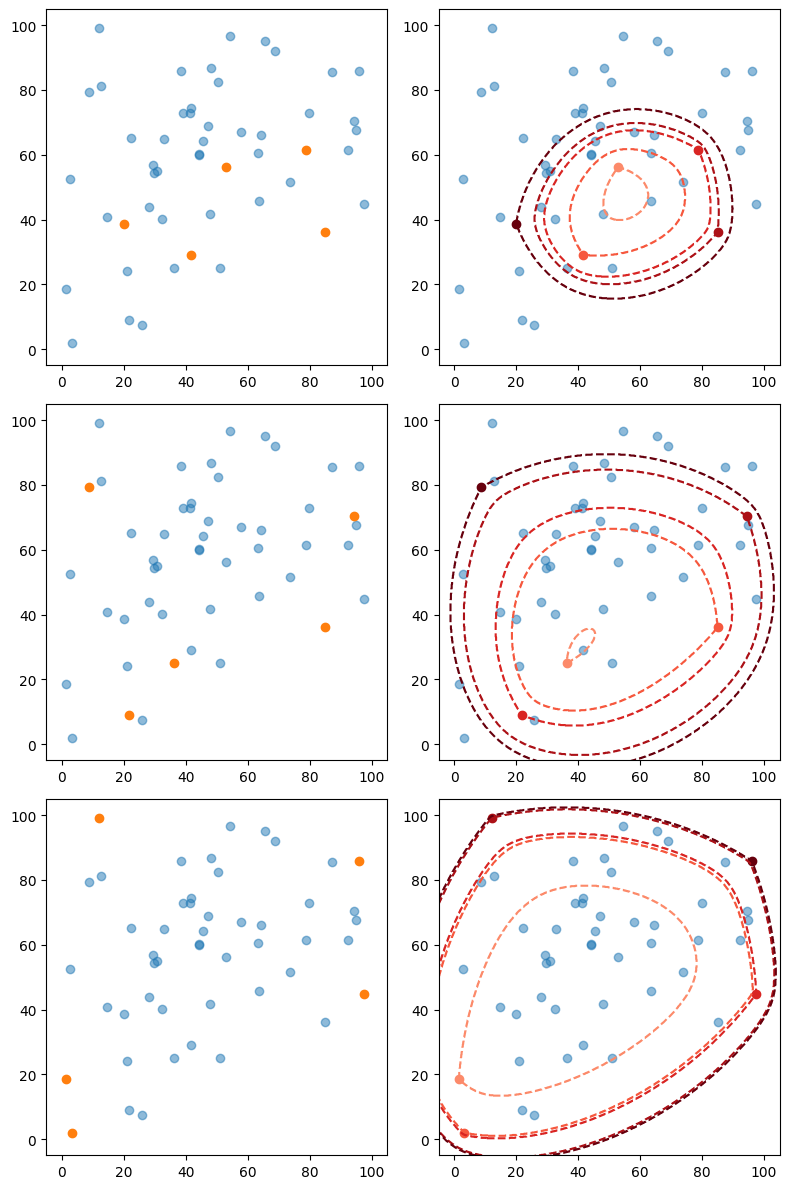

In [4]:
# Setup problem
np.random.seed(38)
n = 50
p = 5
s = 2
dp = DiversityProblem.random(n,p,s)

# Choose a cut a plot
y1 = np.zeros(n)
y1[[3, 30, 44, 39, 7]] = 1

y2 = np.zeros(n)
y2[[1,22,27,15,44]] = 1

y3 = np.zeros(n)
cps = CutPlaneSolver(dp)
cps.solve()
y3[[cps.get_nodes()]]=1

Y = [y1, y2, y3]

fig, axes = plt.subplots(3, 2, figsize=(8, 12))
for k in range(3):
    axes[k,0].plot(dp.locations[Y[k]==0,0],dp.locations[Y[k]==0,1],ls="",marker="o",alpha=0.5)
    axes[k,0].plot(dp.locations[Y[k]==1,0],dp.locations[Y[k]==1,1],ls="",marker="o")
    # for pp in range(n):
    #     axes[k,0].annotate(str(pp),(dp.locations[pp,0],dp.locations[pp,1]))
    for j in range(2):
        axes[k,j].set_xlim(-5,105)
        axes[k,j].set_ylim(-5,105)
    # Let alpha=1, determine all 5 exclusion zones
    ex_X, ex_Y, ex_Z = ex.get_exclusion_zones(dp, Y[k], space_increase=15)
    ex.plot_zones_onto_axes(axes[k,1],Y[k], ex_X, ex_Y, ex_Z,dp)
    print(f"Proportion of removed by y{k+1}:\t",ex.get_proportion_solutions_removed(dp,Y[k]))
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo.pdf")
plt.show()

Proportion of removed by y:	 0.9999999999970414


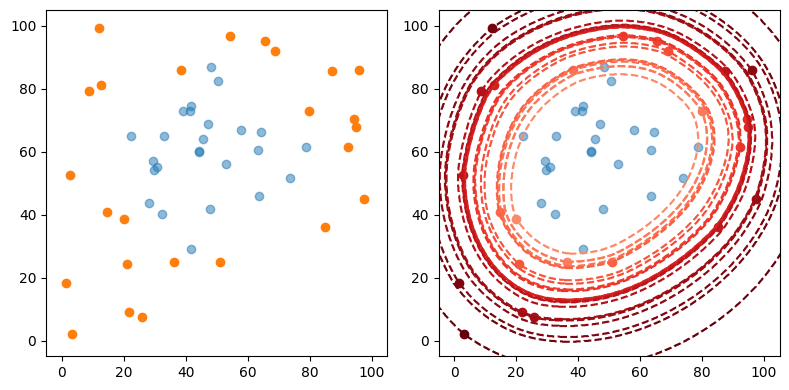

In [5]:
# Setup problem
np.random.seed(38)
n = 50
p = 25
s = 2
dp = DiversityProblem.random(n,p,s)

y = np.zeros(n)
cps = CutPlaneSolver(dp)
cps.solve()
y[[cps.get_nodes()]]=1

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(dp.locations[y==0,0],dp.locations[y==0,1],ls="",marker="o",alpha=0.5)
axes[0].plot(dp.locations[y==1,0],dp.locations[y==1,1],ls="",marker="o")
# for pp in range(n):
#     axes[k,0].annotate(str(pp),(dp.locations[pp,0],dp.locations[pp,1]))
for j in range(2):
    axes[j].set_xlim(-5,105)
    axes[j].set_ylim(-5,105)
# Let alpha=1, determine all 5 exclusion zones
ex_X, ex_Y, ex_Z = ex.get_exclusion_zones(dp, y, space_increase=15)
ex.plot_zones_onto_axes(axes[1],y, ex_X, ex_Y, ex_Z,dp)
print(f"Proportion of removed by y:\t",0.9999999999970414 ) #ex.get_proportion_solutions_removed(dp,y))
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_big.pdf")
plt.show()

# Circle Exclusion

In [6]:
# Setup problem
nc=20
pc=5
np.random.seed(11)
dpc = DiversityProblem.circle(nc,pc,s)

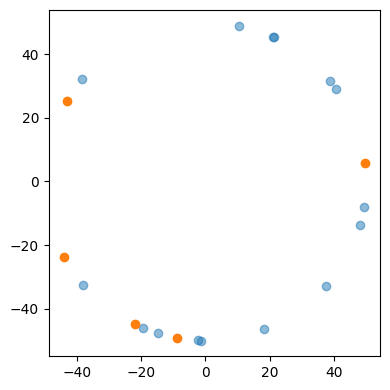

In [7]:
y1c = ex.get_rand_sol(dpc)

fig,axes = plt.subplots(1,figsize=(4,4))
axes.plot(dpc.locations[y1c==0,0],dpc.locations[y1c==0,1],ls="",marker="o",alpha=0.5)
axes.plot(dpc.locations[y1c==1,0],dpc.locations[y1c==1,1],ls="",marker="o")
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_circle_sol.pdf")
plt.show()

In [8]:
X_1ac, Y_1ac, Z_1ac = ex.get_exclusion_zones(dpc,y1c,space_increase=20)

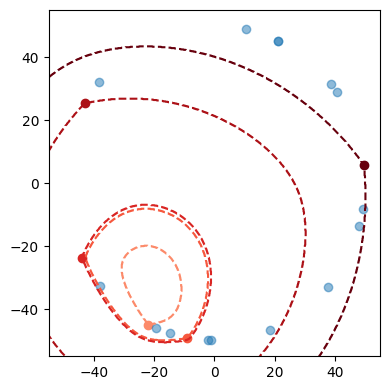

In [9]:
# Choose a cut a plot
fig,axes = plt.subplots(1,figsize=(4,4))
ex.plot_zones_onto_axes(axes,y1c,X_1ac,Y_1ac,Z_1ac,dpc)
axes.set_xlim(-55,55)
axes.set_ylim(-55,55)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_circle_zones_a.pdf")
plt.show()

In [10]:
y1c = ex.get_heur_sol(dpc,timelimit=10)

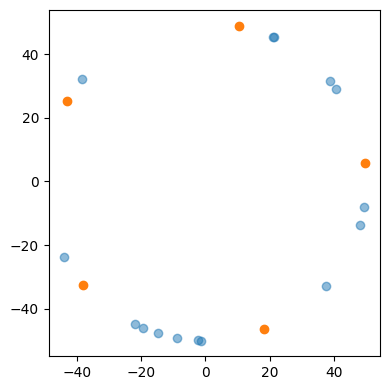

In [11]:
y1c = ex.get_heur_sol(dpc,timelimit=10)

fig,axes = plt.subplots(1,figsize=(4,4))
axes.plot(dpc.locations[y1c==0,0],dpc.locations[y1c==0,1],ls="",marker="o",alpha=0.5)
axes.plot(dpc.locations[y1c==1,0],dpc.locations[y1c==1,1],ls="",marker="o")
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_circle_sol.pdf")
plt.show()

In [12]:
X_1ac, Y_1ac, Z_1ac = ex.get_exclusion_zones(dpc,y1c,space_increase=20)

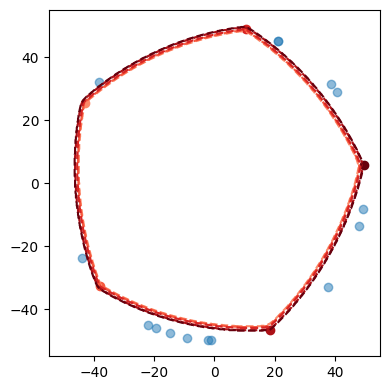

In [13]:
# Choose a cut a plot
fig,axes = plt.subplots(1,figsize=(4,4))
ex.plot_zones_onto_axes(axes,y1c,X_1ac,Y_1ac,Z_1ac,dpc)
axes.set_xlim(-55,55)
axes.set_ylim(-55,55)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_circle_zones_b.pdf")
plt.show()

In [14]:
print("Proportion of removed solutions:\t",ex.get_proportion_solutions_removed(dpc,y1c))

Proportion of removed solutions:	 6.449948400412796e-05


# Projections

In [18]:
import copy

# Setup problem
np.random.seed(4)
n = 50
p = 5
s = 2
dp = DiversityProblem.random(n,p,s)

y = np.zeros(n)
y[[4,17,27,35,39]] = 1

X, Y, Z = ex.get_exclusion_zones(dp,y,space_increase=30)

dp_py = copy.deepcopy(dp)
dp_py.locations[:,0] = dp_py.locations[:,0] * 0
dp_py._build_edm()
X_py, Y_py, Z_py = ex.get_exclusion_zones(dp_py,y,space_increase=30)

dp_px = copy.deepcopy(dp)
dp_px.locations[:,1] = dp_px.locations[:,1] * 0
dp_px._build_edm()
X_px, Y_px, Z_px = ex.get_exclusion_zones(dp_px,y,space_increase=30)

/tmp/ipykernel_21388/538516849.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


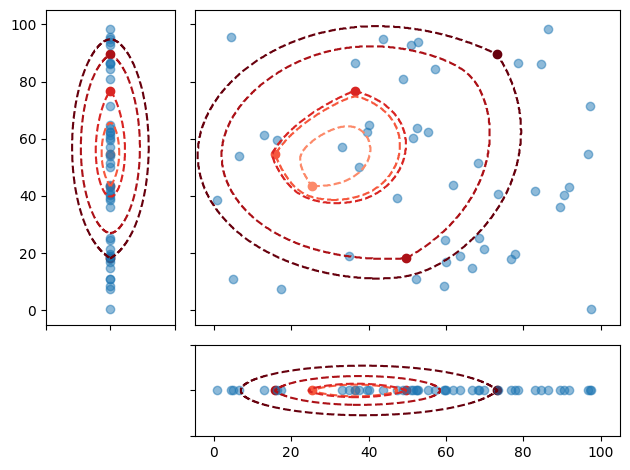

In [19]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    BAAA
    BAAA
    BAAA
    .CCC
    """
)

ex.plot_zones_onto_axes(axd["A"],y,X,Y,Z,dp)
ex.plot_zones_onto_axes(axd["B"],y,X_py,Y_py,Z_py,dp_py)
ex.plot_zones_onto_axes(axd["C"],y,X_px,Y_px,Z_px,dp_px)

axd["A"].tick_params(labelbottom=False,labelleft=False)
axd["B"].tick_params(labelbottom=False)
axd["C"].tick_params(labelleft=False)

axd["A"].set_xlim(-5,105)
axd["A"].set_ylim(-5,105)
axd["B"].set_xlim(-50,50)
axd["B"].set_ylim(-5,105)
axd["C"].set_xlim(-5,105)
axd["C"].set_ylim(-50,50)

plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_projection.pdf")
plt.show()